## Data Exploration and Processing

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('aerofit_treadmill_data.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [28]:
data.shape

(180, 9)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [30]:
data.isna()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


In [31]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [32]:
data[data.duplicated(keep='first')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


## Statiscal Summary and Non-Graphical Analysis

In [33]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [34]:
data.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [35]:
# for column in data.select_dtypes(include=['number']).columns:
#     plt.figure(figsize=(6,4))
#     sns.histplot(data[column],kde=True)
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.tight_layout()
#     plt.show

### Graphical Analysis - Numerical Features

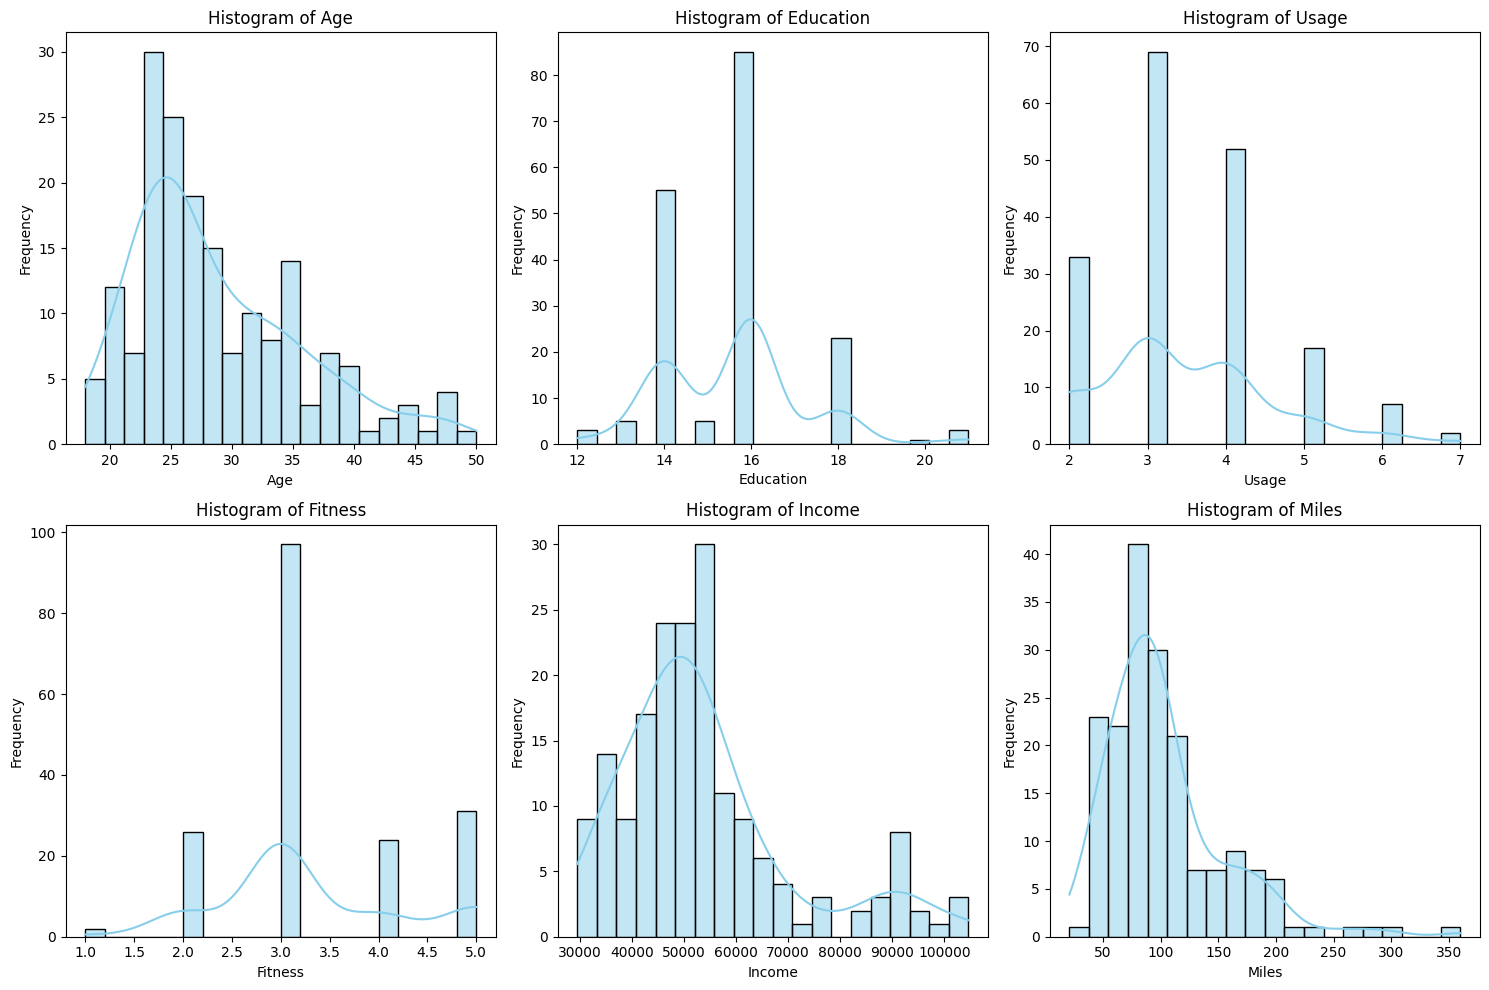

In [359]:
numeric_columns = data.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)

# Create subplots based on the number of columns
fig, axes = plt.subplots(nrows=(num_cols // 3), ncols=3, figsize=(15, 10))
#  axes direct figs
# figs, axes = 3 x 3 shape

axes = axes.flatten()
# axes becomes 1 x 9

for ax, column in zip(axes, numeric_columns):
    # axes = 9, columns = 6
    # this loops run a total of 9 times
    # there are three empty axes

    sns.histplot(data[column], ax=ax, kde=True, bins=20, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots if any
# for i in range(len(numeric_columns), len(axes)):
#     fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Index(['Age', 'Education', 'Usage', 'Fitness', 'Miles'], dtype='object')

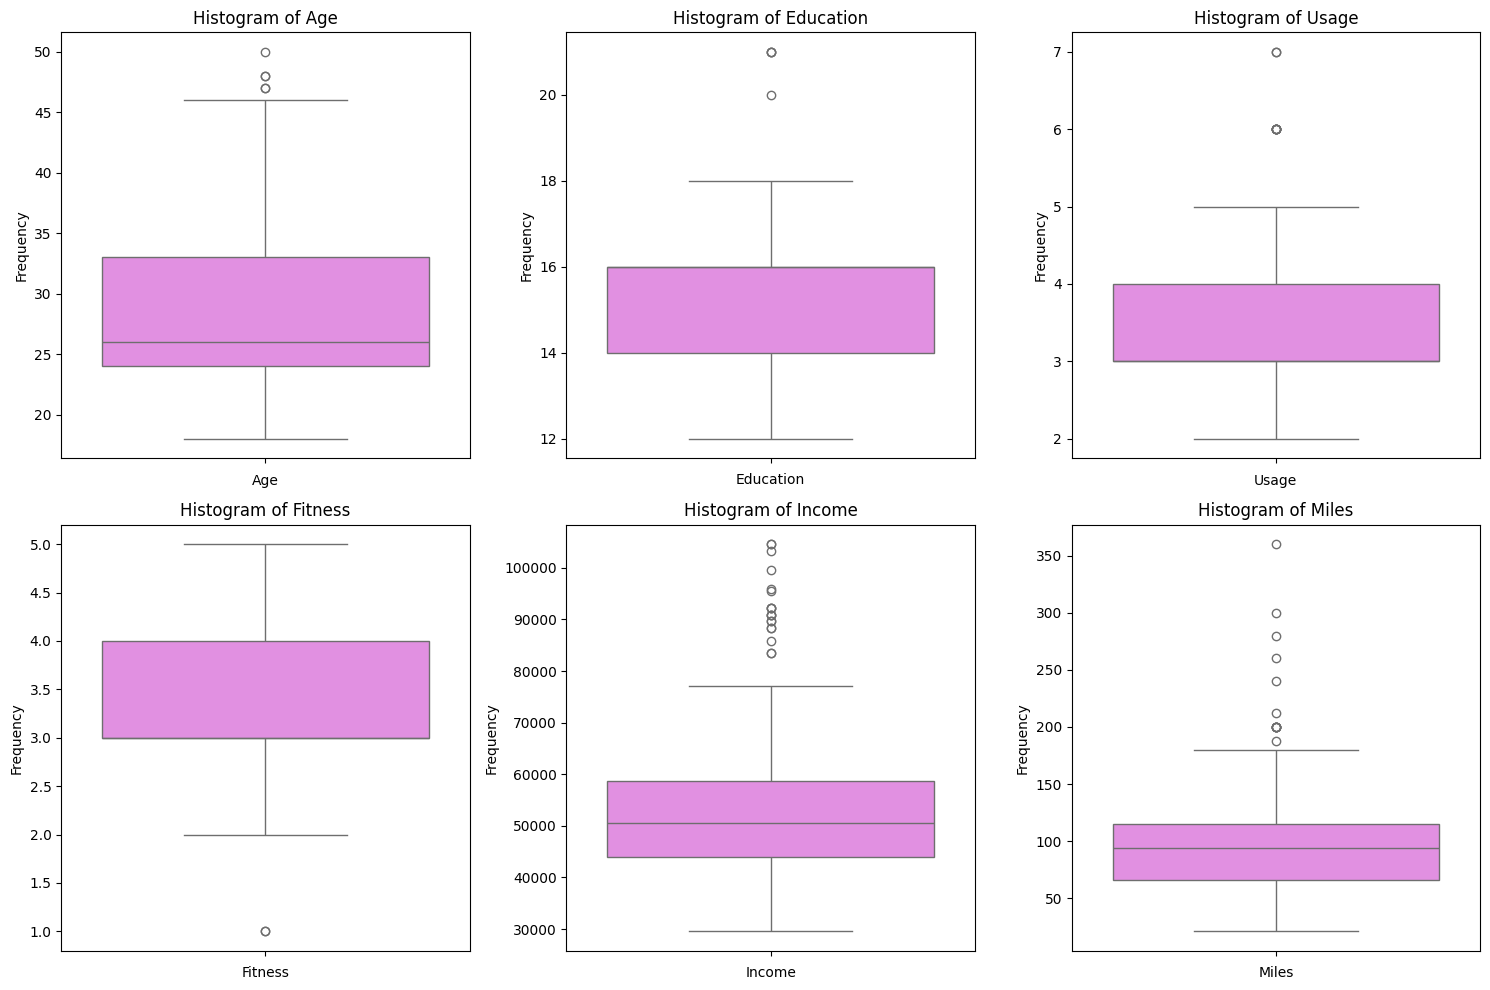

In [358]:

numeric_columns = data.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)

# Create subplots based on the number of columns
fig, axes = plt.subplots(nrows=(num_cols // 3), ncols=3, figsize=(15, 10))
#  axes direct figs
# figs, axes = 3 x 3 shape

axes = axes.flatten()
# axes becomes 1 x 9

for ax, column in zip(axes, numeric_columns):
    # axes = 9, columns = 6
    # this loops run a total of 9 times
    # there are three empty axes

    sns.boxplot(data[column], ax=ax, color='violet')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots if any
# for i in range(len(numeric_columns), len(axes)):
#     fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Graphical Analysis - Categorical Features

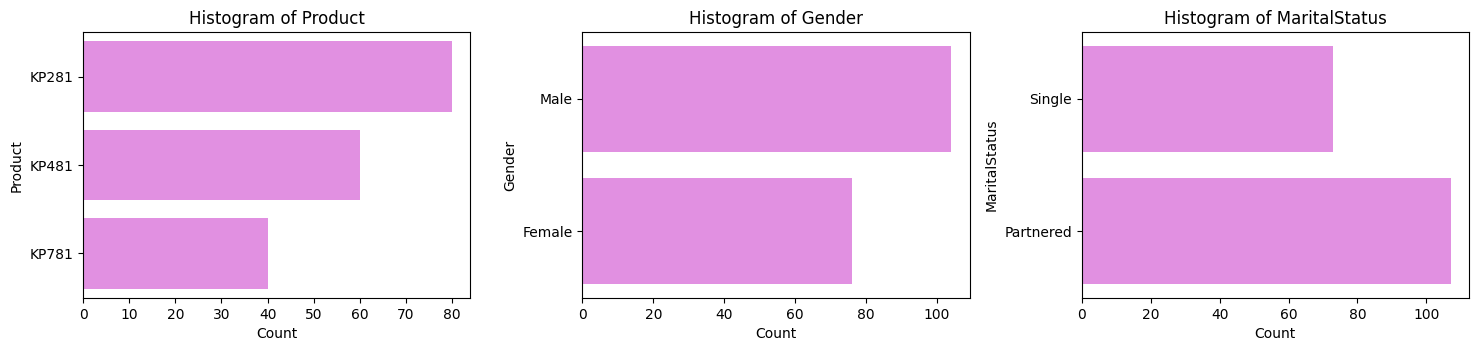

In [361]:
categorical_columns = data.select_dtypes(include=['object']).columns

cat_cols = len(categorical_columns)
fig, axes = plt.subplots(nrows = (cat_cols//1), ncols=3, figsize=(15,10))
axes = axes.flatten()

for ax, column in zip(axes, categorical_columns):
    
    sns.countplot(data[column], ax=ax, color='violet')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Count')
    ax.set_ylabel(column)
    
plt.tight_layout()
plt.show

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])


### Bivariate Analysis

In [62]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


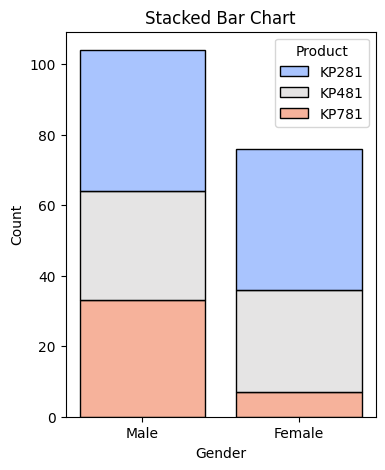

In [328]:
plt.figure(figsize=(4,5))
sns.histplot(data=data, x="Gender", hue="Product", multiple="stack", shrink=0.8, palette="coolwarm")

plt.title("Stacked Bar Chart")
plt.show()

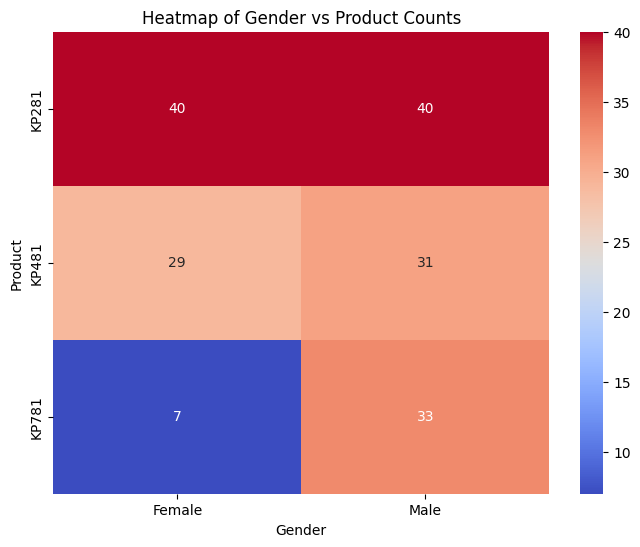

In [327]:
contingency_table = pd.crosstab(data['Product'], data['Gender'])

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt="d")

# Add labels and title
plt.title("Heatmap of Gender vs Product Counts")
plt.xlabel("Gender")
plt.ylabel("Product")

# Display the plot
plt.show()

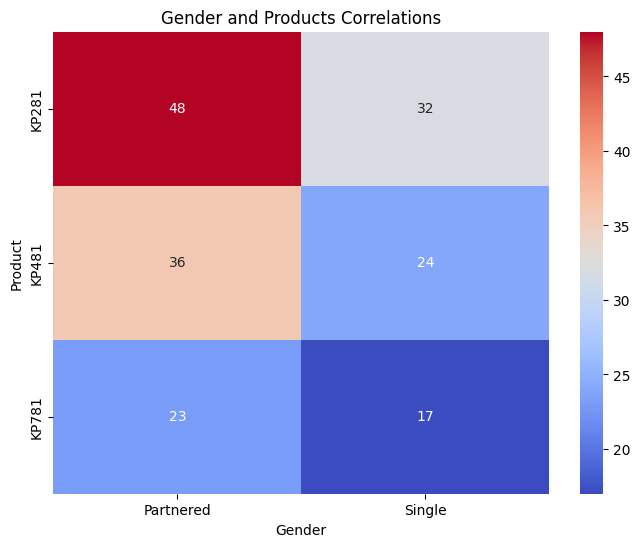

In [326]:
contingency_table = pd.crosstab(data['Product'], data['MaritalStatus'])

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt="d")

# Add labels and title
plt.title("Gender and Products Correlations")
plt.xlabel("Gender")
plt.ylabel("Product")

# Display the plot
plt.show()

In [82]:
women_kp281 = data[(data['Product'] == 'KP281') & (data['MaritalStatus'] == 'Single')]

# Count how many women own kp281
count_women_kp281 = women_kp281.shape[0]

# Display the result
print(f"Number of women who own kp281: {count_women_kp281}")

Number of women who own kp281: 32


In [ ]:
# pivot_table = pd.crosstab(data['Age'], data['Product'])

# # Plot heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# # Add titles and labels
# plt.title('Heatmap of Age vs Product')
# plt.xlabel('Product')
# plt.ylabel('Age')

# # Show the plot
# plt.tight_layout()
# plt.show()


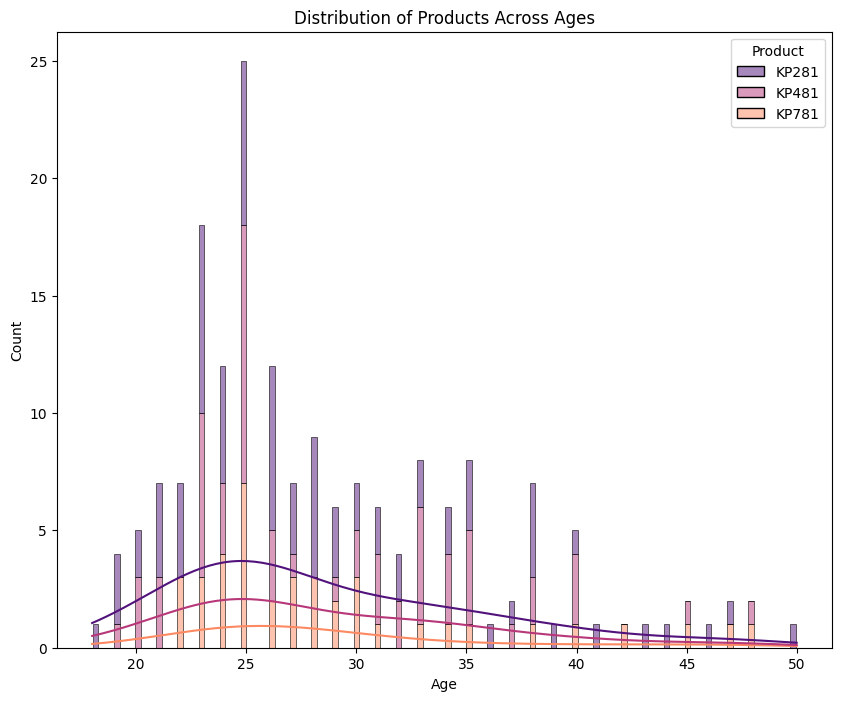

In [321]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x="Age", hue="Product", multiple="stack", shrink=0.8, palette="magma", bins=100, kde=True)

plt.title("Distribution of Products Across Ages")
plt.show()

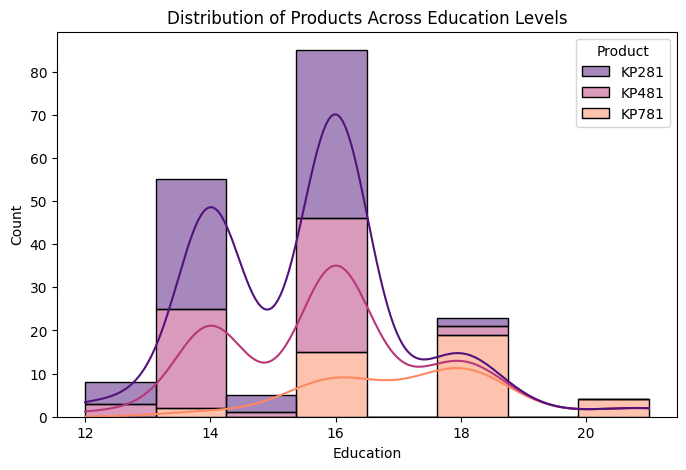

In [319]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="Education", hue="Product", multiple="stack", bins=8,palette="magma", kde=True)

plt.title("Distribution of Products Across Education Levels")
plt.show()

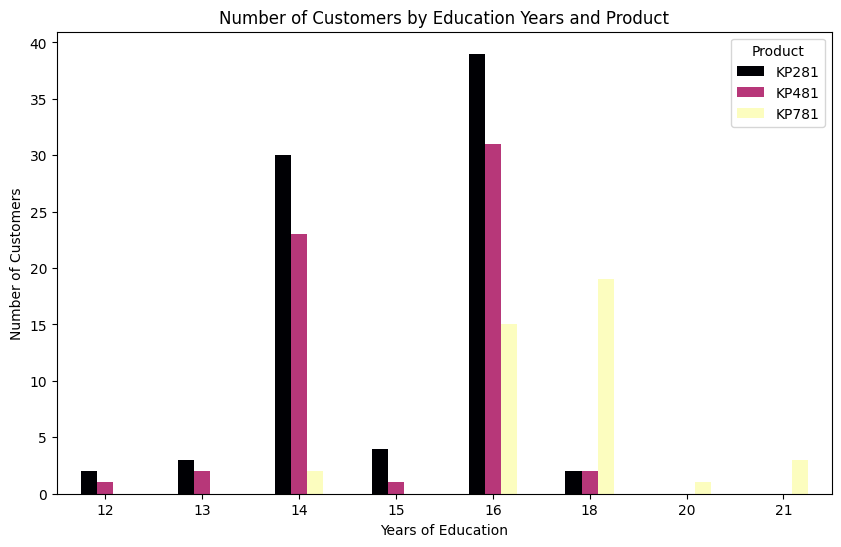

In [320]:
edu_product_counts = data.groupby(['Education', 'Product']).size().unstack()

# Plot as grouped bar chart
edu_product_counts.plot(kind='bar', figsize=(10,6), colormap='magma')

plt.title("Number of Customers by Education Years and Product")
plt.xlabel("Years of Education")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Product")
plt.show()

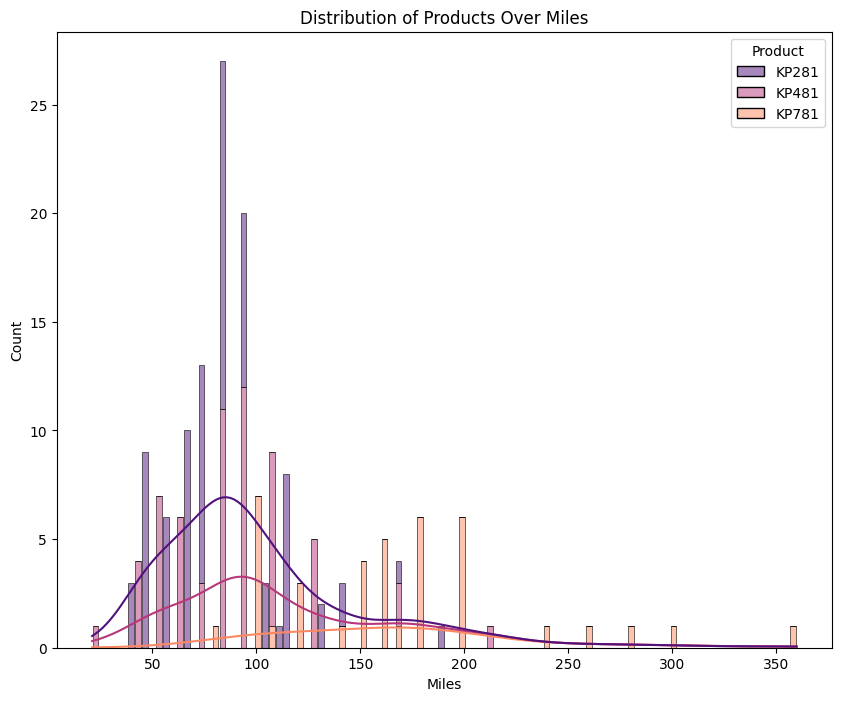

In [364]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x="Miles", hue="Product", multiple="stack", shrink=0.8, palette="magma", bins=100, kde=True)

plt.title("Distribution of Products Over Miles")
plt.show()

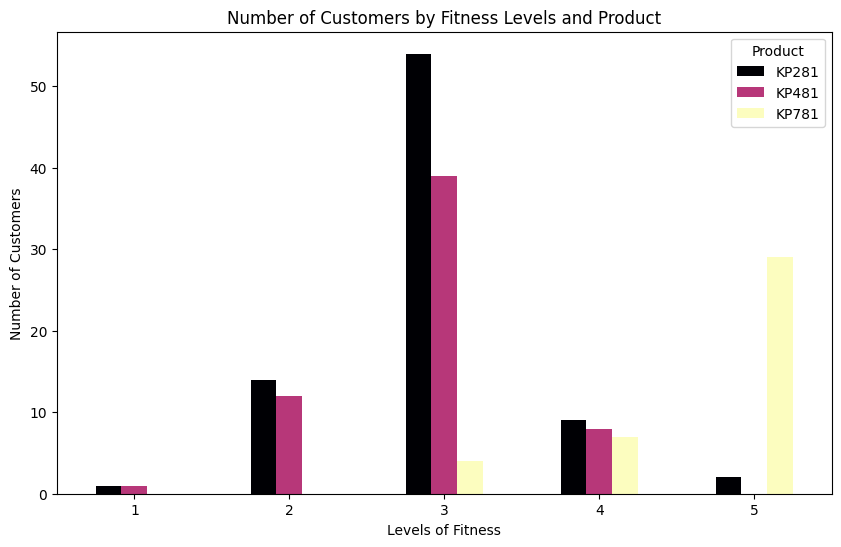

In [365]:
edu_product_counts = data.groupby(['Fitness', 'Product']).size().unstack()

# Plot as grouped bar chart
edu_product_counts.plot(kind='bar', figsize=(10,6), colormap='magma')

plt.title("Number of Customers by Fitness Levels and Product")
plt.xlabel("Levels of Fitness")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Product")
plt.show()

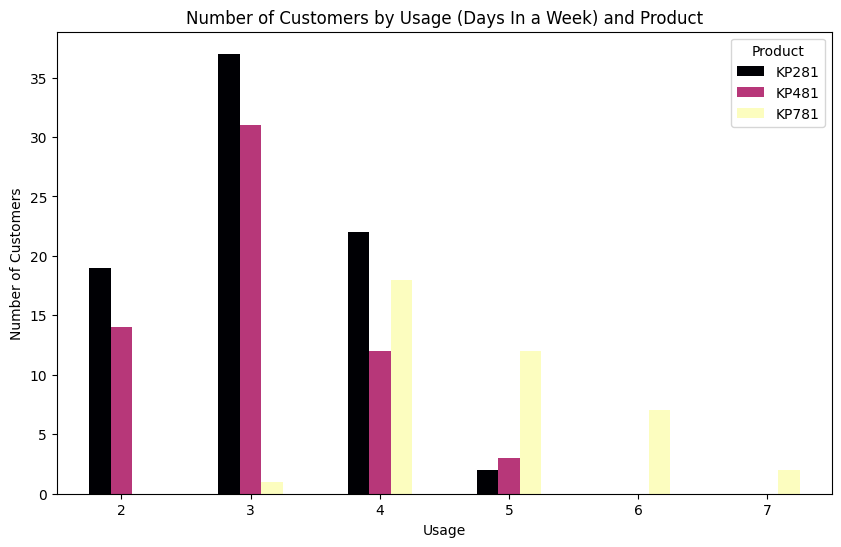

In [366]:
edu_product_counts = data.groupby(['Usage', 'Product']).size().unstack()

# Plot as grouped bar chart
edu_product_counts.plot(kind='bar', figsize=(10,6), colormap='magma')

plt.title("Number of Customers by Usage (Days In a Week) and Product")
plt.xlabel("Usage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Product")
plt.show()

In [307]:
data['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

### Multivariate Analysis: 

In [97]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

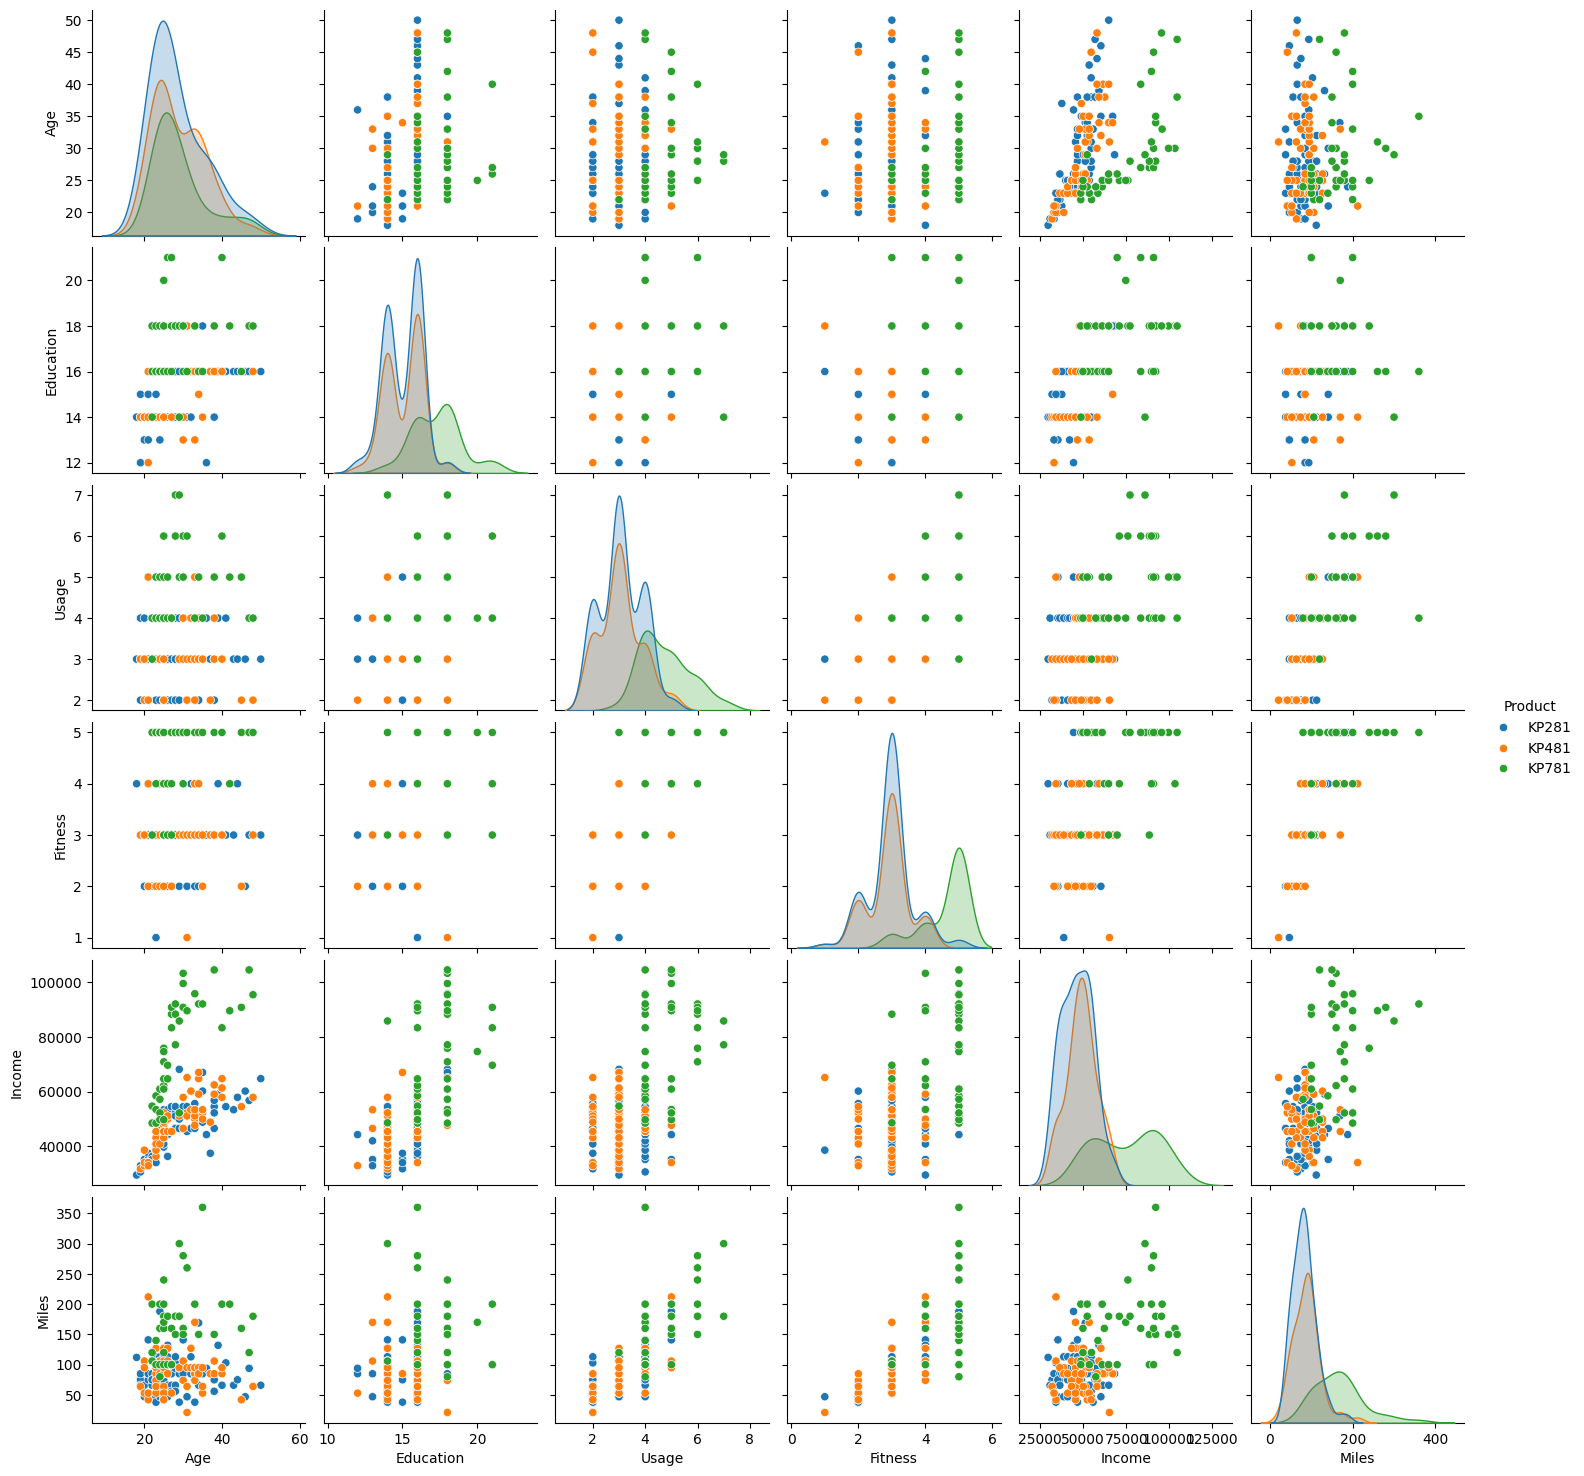

In [96]:
sns.pairplot(data=data, hue='Product')

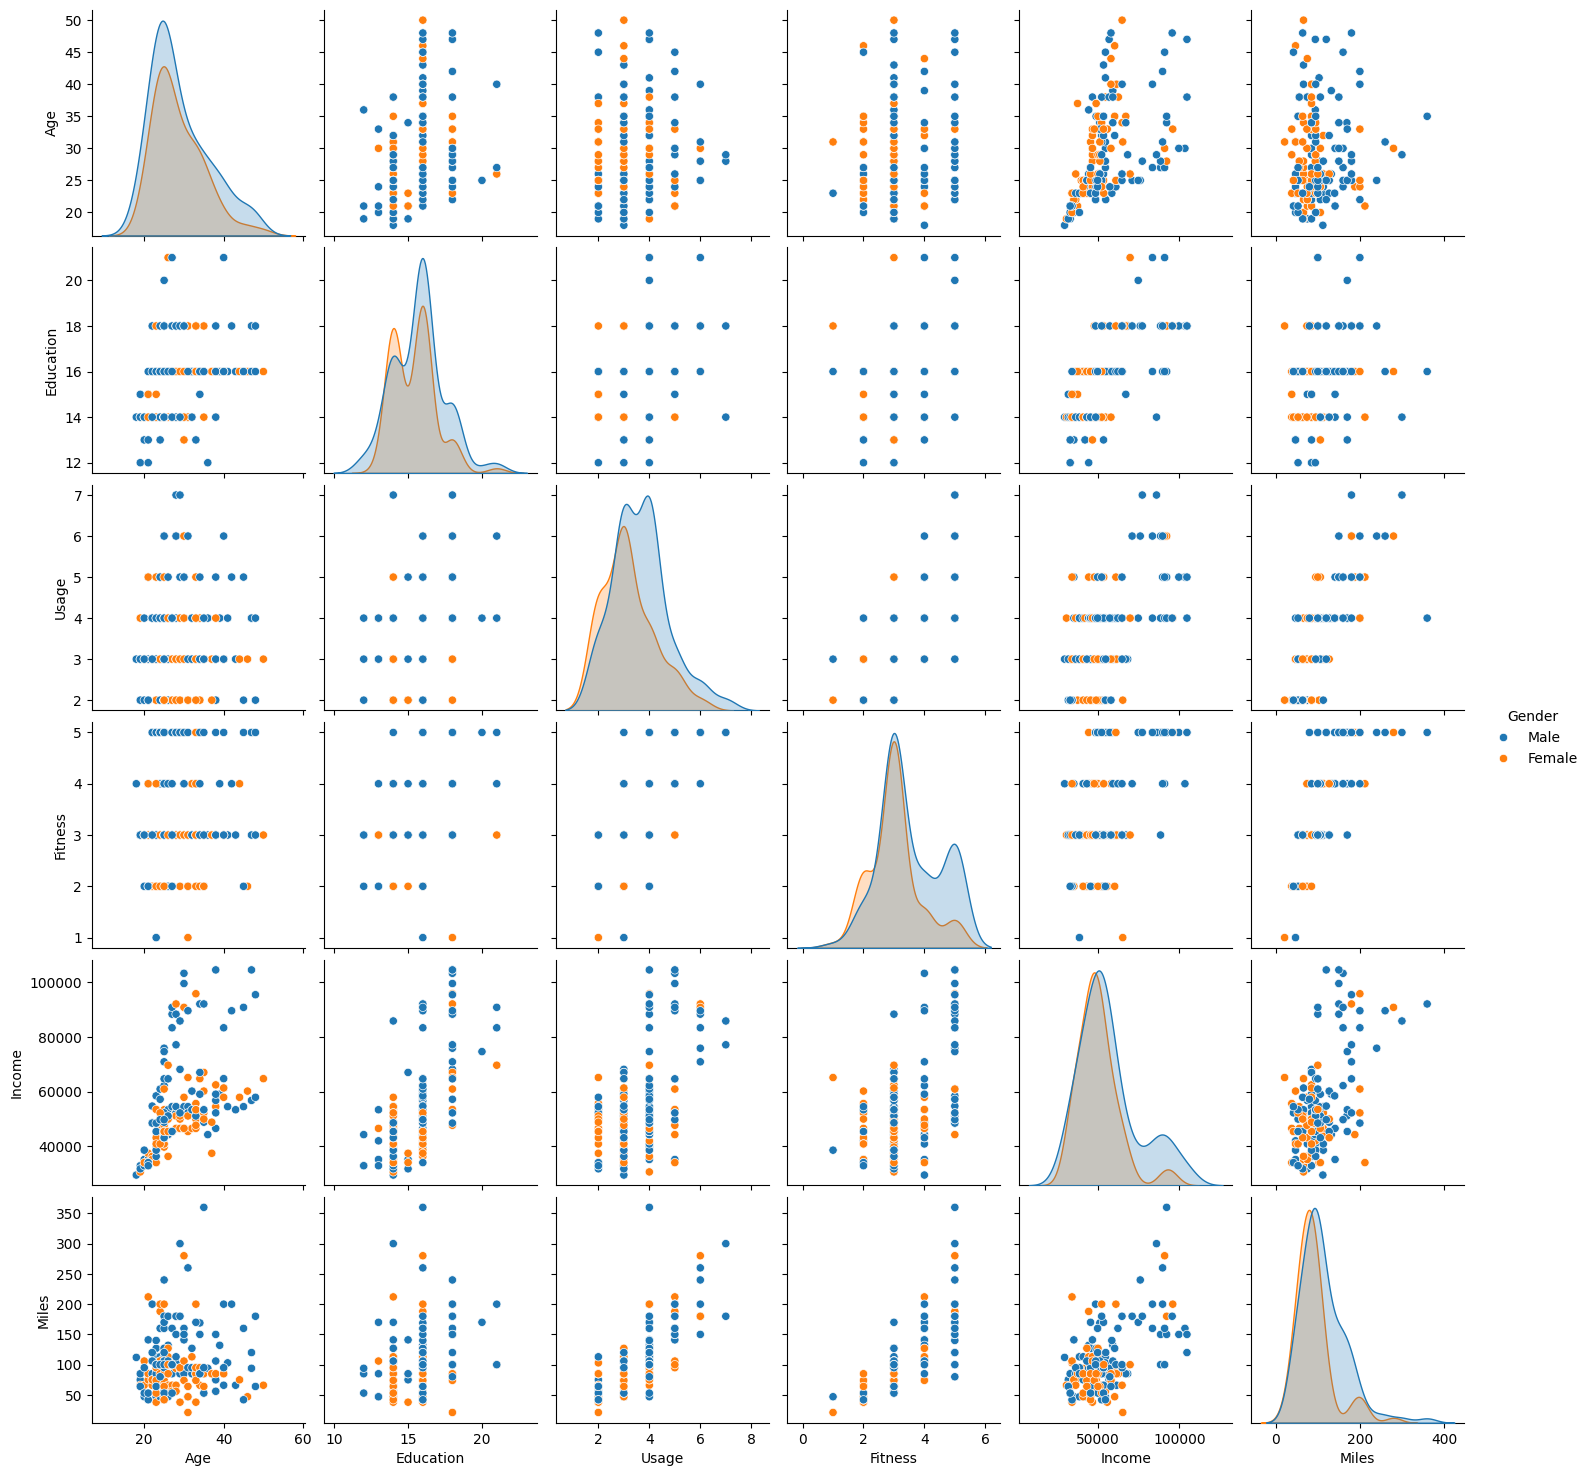

In [ ]:
sns.pairplot(data=data, hue='Gender')

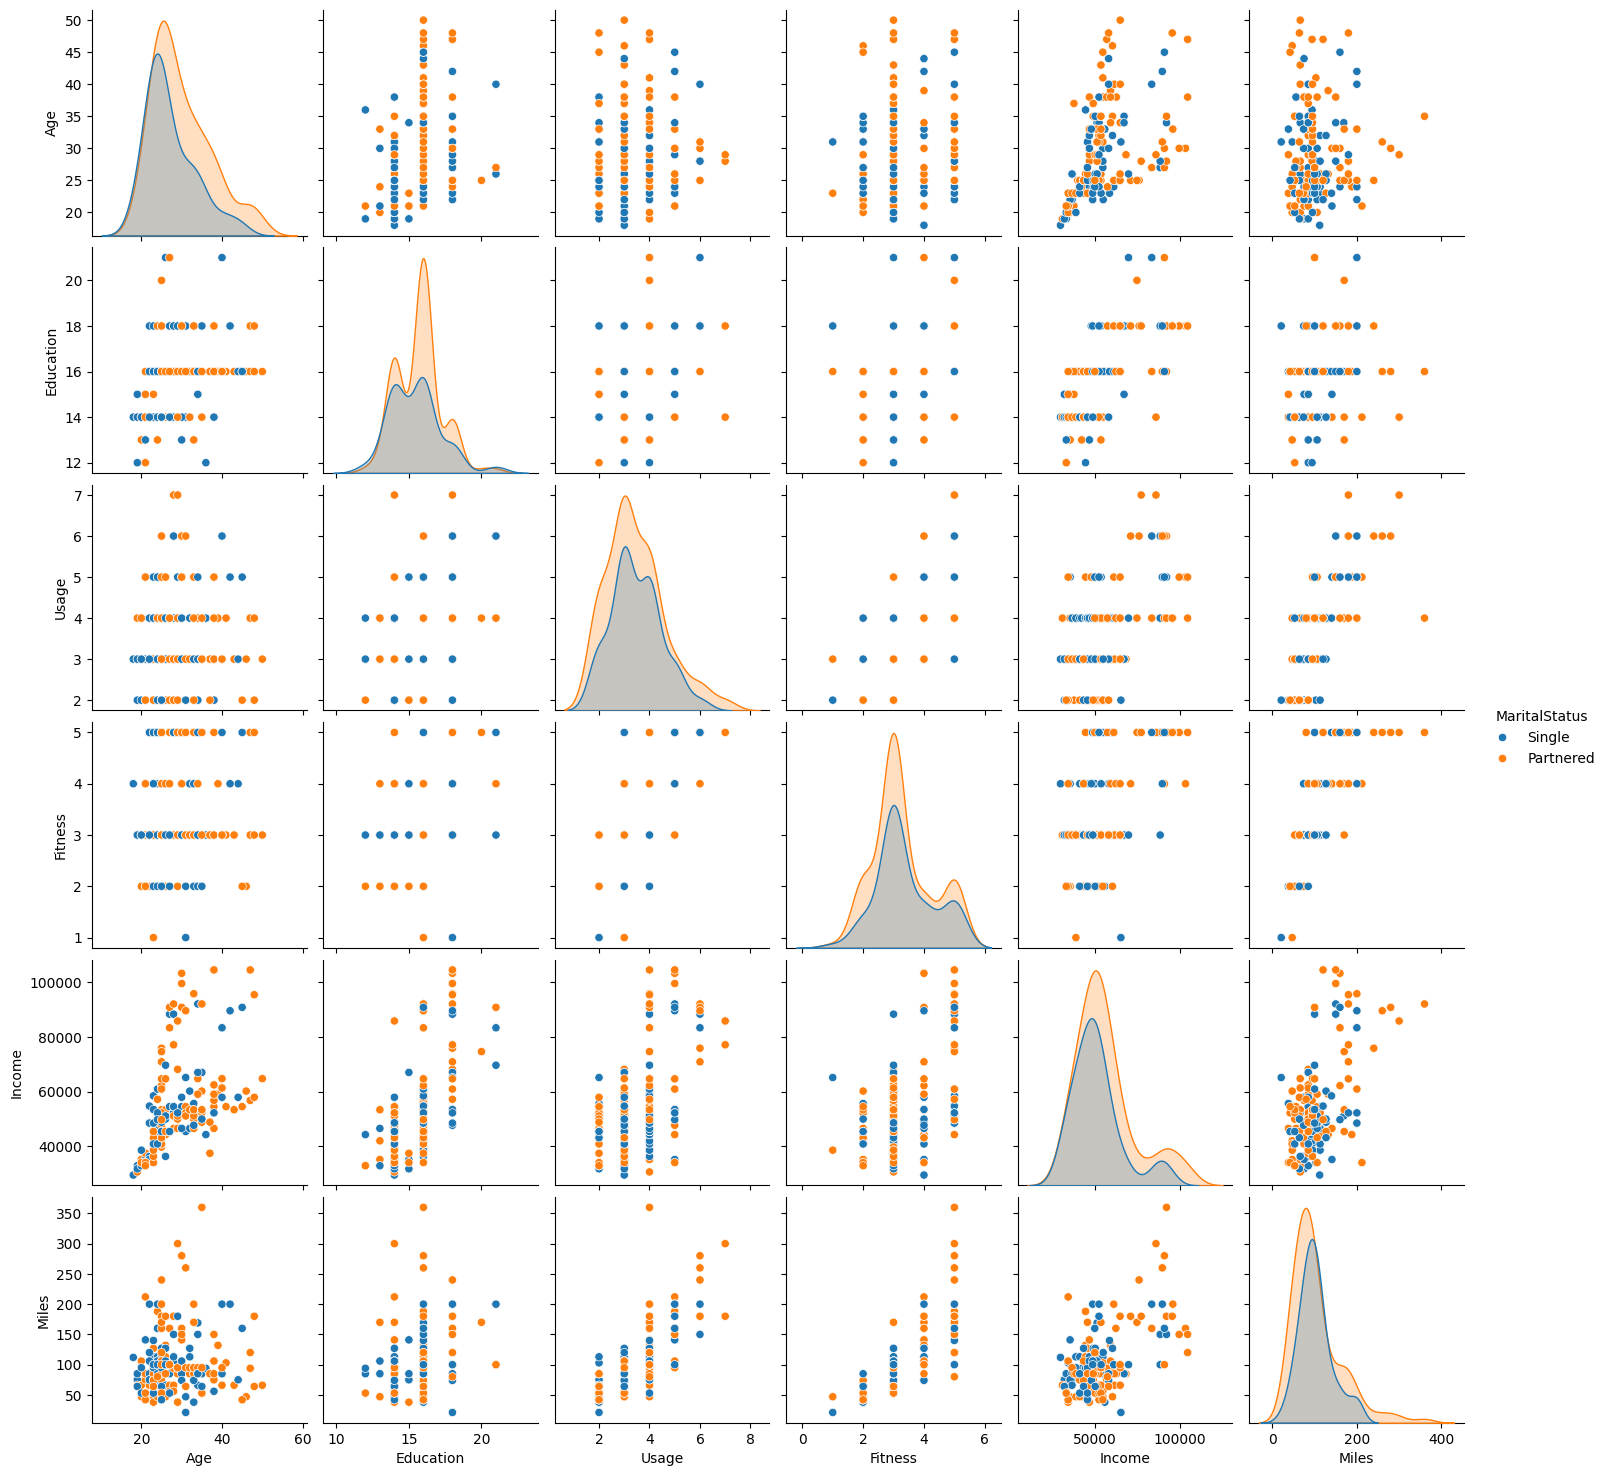

In [342]:
sns.pairplot(data=data,hue='MaritalStatus')

### Correlation Analysis

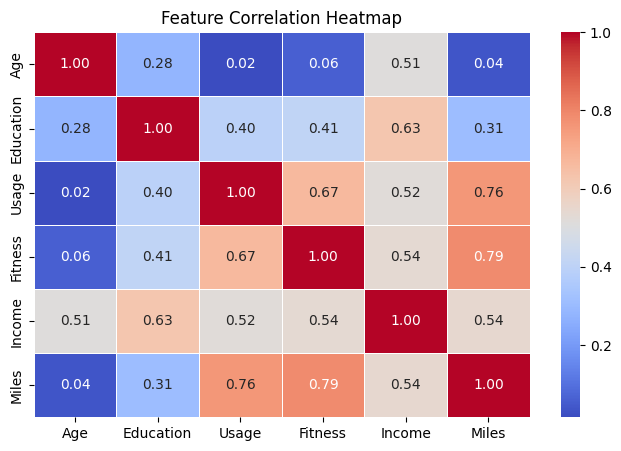

In [340]:

numeric_df = data.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap")
plt.show()


### Observations from the Heatmap  

#### **Key Insights**  

- The **use of a treadmill** is positively correlated with **fitness levels**, showing a **correlation of 0.67**. This suggests that increased treadmill usage contributes to improved fitness.  
- **Miles ran on the treadmill** strongly correlate with **treadmill usage** (**0.76**), which is expected since miles represent the extent of usage.  
- The above two points also imply that **the more miles a person runs on the treadmill, the greater their fitness improvement**.  

#### **Additional Observations**  

- **Education and income** exhibit a strong correlation, indicating the well-established trend that **higher education levels often lead to higher income**.  

#### **Positive Correlations**  

- None of the correlations are negative, meaning **no feature decreases as another increases**. This suggests a general trend where **all features either rise together or remain neutral** in relation to each other.

### Outlier Detection

In [106]:
# This will help me find if there any anomalies in categorical data

data.describe(include=object)


,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


- Gender = 2 ✅ (Male, Female)
</br>
- Marital Status = 2 ✅ (Single, Partnered)
</br>
- Products = 3 ✅ (KP281, KP481, KP781)

#### Outliers in Numerical Data
- Distribution and Boxplots are needed side by side to analyze outliers 
- From now on, I will investigate features one by one
- Eventually, I will also use IQR to cross check and find the records where outliers appear.

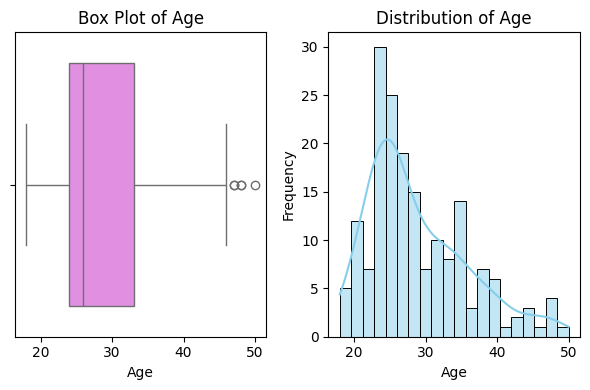

In [349]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
column = 'Age'
# Boxplot on the left
sns.boxplot(x=data[column], ax=axes[0], color='violet')
axes[0].set_title(f'Box Plot of {column}')
axes[0].set_xlabel(column)

# Histogram with KDE on the right
sns.histplot(data[column], ax=axes[1], kde=True, bins=20, color='skyblue')
axes[1].set_title(f'Distribution of {column}')
axes[1].set_xlabel(column)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [129]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = data[(data['Age'] > upper_bound)]
print(outliers)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
78    KP281   47    Male         16     Partnered      4        3   56850   
79    KP281   50  Female         16     Partnered      3        3   64809   
139   KP481   48    Male         16     Partnered      2        3   57987   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
78      94  
79      66  
139     64  
178    120  
179    180  


In [132]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

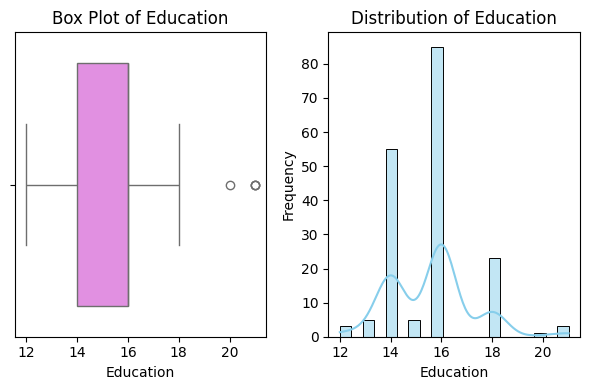

In [350]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
column = 'Education'
# Boxplot on the left
sns.boxplot(x=data[column], ax=axes[0], color='violet')
axes[0].set_title(f'Box Plot of {column}')
axes[0].set_xlabel(column)

# Histogram with KDE on the right
sns.histplot(data[column], ax=axes[1], kde=True, bins=20, color='skyblue')
axes[1].set_title(f'Distribution of {column}')
axes[1].set_xlabel(column)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [134]:
Q1 = data['Education'].quantile(0.25)
Q3 = data['Education'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = data[(data['Education'] > upper_bound)]
print(outliers)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
156   KP781   25    Male         20     Partnered      4        5   74701   
157   KP781   26  Female         21        Single      4        3   69721   
161   KP781   27    Male         21     Partnered      4        4   90886   
175   KP781   40    Male         21        Single      6        5   83416   

     Miles  
156    170  
157    100  
161    100  
175    200  


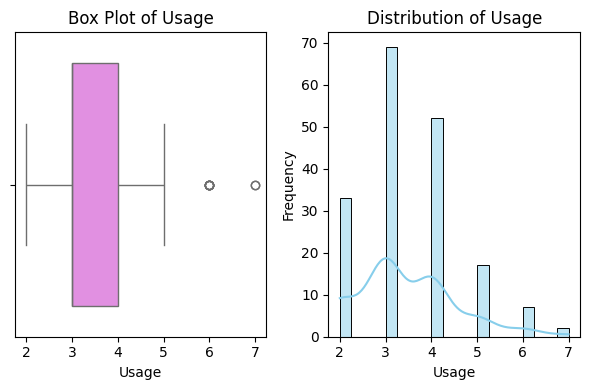

In [351]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
column = 'Usage'
# Boxplot on the left
sns.boxplot(x=data[column], ax=axes[0], color='violet')
axes[0].set_title(f'Box Plot of {column}')
axes[0].set_xlabel(column)

# Histogram with KDE on the right
sns.histplot(data[column], ax=axes[1], kde=True, bins=20, color='skyblue')
axes[1].set_title(f'Distribution of {column}')
axes[1].set_xlabel(column)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [138]:
column = 'Usage'
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = data[(data[column] > upper_bound)]
print(outliers)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
154   KP781   25    Male         18     Partnered      6        4   70966   
155   KP781   25    Male         18     Partnered      6        5   75946   
162   KP781   28  Female         18     Partnered      6        5   92131   
163   KP781   28    Male         18     Partnered      7        5   77191   
164   KP781   28    Male         18        Single      6        5   88396   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
170   KP781   31    Male         16     Partnered      6        5   89641   
175   KP781   40    Male         21        Single      6        5   83416   

     Miles  
154    180  
155    240  
162    180  
163    180  
164    150  
166    300  
167    280  
170    260  
175    200  


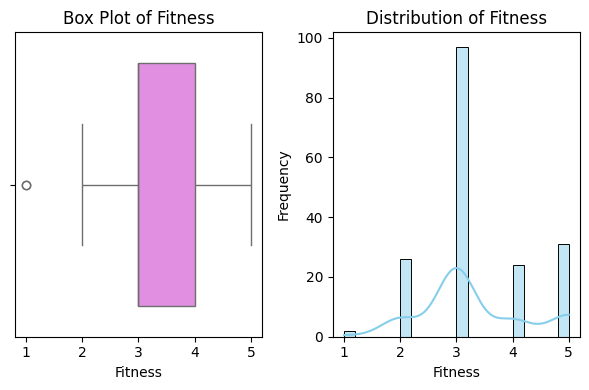

In [352]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
column = 'Fitness'
# Boxplot on the left
sns.boxplot(x=data[column], ax=axes[0], color='violet')
axes[0].set_title(f'Box Plot of {column}')
axes[0].set_xlabel(column)

# Histogram with KDE on the right
sns.histplot(data[column], ax=axes[1], kde=True, bins=20, color='skyblue')
axes[1].set_title(f'Distribution of {column}')
axes[1].set_xlabel(column)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


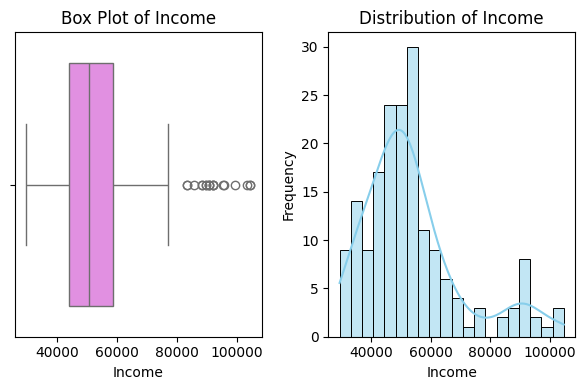

In [354]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
column = 'Income'
# Boxplot on the left
sns.boxplot(x=data[column], ax=axes[0], color='violet')
axes[0].set_title(f'Box Plot of {column}')
axes[0].set_xlabel(column)

# Histogram with KDE on the right
sns.histplot(data[column], ax=axes[1], kde=True, bins=20, color='skyblue')
axes[1].set_title(f'Distribution of {column}')
axes[1].set_xlabel(column)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [146]:
column = 'Income'
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = data[(data[column] > upper_bound)]
print(outliers)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
159   KP781   27    Male         16     Partnered      4        5   83416   
160   KP781   27    Male         18        Single      4        3   88396   
161   KP781   27    Male         21     Partnered      4        4   90886   
162   KP781   28  Female         18     Partnered      6        5   92131   
164   KP781   28    Male         18        Single      6        5   88396   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
168   KP781   30    Male         18     Partnered      5        4  103336   
169   KP781   30    Male         18     Partnered      5        5   99601   
170   KP781   31    Male         16     Partnered      6        5   89641   
171   KP781   33  Female         18     Partnered      4        5   95866   
172   KP781   34    Male         16        Single      5        5   92131   

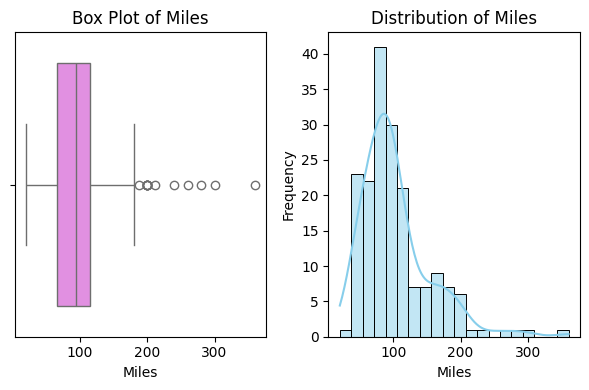

In [355]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
column = 'Miles'
# Boxplot on the left
sns.boxplot(x=data[column], ax=axes[0], color='violet')
axes[0].set_title(f'Box Plot of {column}')
axes[0].set_xlabel(column)

# Histogram with KDE on the right
sns.histplot(data[column], ax=axes[1], kde=True, bins=20, color='skyblue')
axes[1].set_title(f'Distribution of {column}')
axes[1].set_xlabel(column)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [150]:
column = 'Miles'
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = data[(data[column] > upper_bound)]
print(outliers)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
23    KP281   24  Female         16     Partnered      5        5   44343   
84    KP481   21  Female         14     Partnered      5        4   34110   
142   KP781   22    Male         18        Single      4        5   48556   
148   KP781   24  Female         16        Single      5        5   52291   
152   KP781   25  Female         18     Partnered      5        5   61006   
155   KP781   25    Male         18     Partnered      6        5   75946   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
170   KP781   31    Male         16     Partnered      6        5   89641   
171   KP781   33  Female         18     Partnered      4        5   95866   
173   KP781   35    Male         16     Partnered      4        5   92131   
175   KP781   40    Male         21        Single      6        5   83416   

### Conditional Probabilities

In [185]:
size_of_data = len(data)

In [186]:
percentages = round(data['Product'].value_counts()/size_of_data,2)*100
percentages

Product
KP281    44.0
KP481    33.0
KP781    22.0
Name: count, dtype: float64

### Frequency Tables



#### Product and Gender

In [268]:

# Percentage of a Male customer purchasing a treadmill 
gender_data = round(pd.crosstab(data['Gender'],'Products')/len(data)*100,2)
gender_data


col_0,Products
Gender,
Female,42.22
Male,57.78


In [272]:
#Percentage of a Female customer purchasing KP781 treadmill


gender_data_with_specific_prod = round(pd.crosstab(data['Gender'], data['Product'])/data[(data['Gender']=='Female')].shape[0]*100,2)
gender_data_with_specific_prod

Product,KP281,KP481,KP781
Gender,,,
Female,52.63,38.16,9.21
Male,52.63,40.79,43.42


In [273]:
# Probability of a customer being a Female given that Product
gender_data_with_specific_prod = round(pd.crosstab(data['Gender'], data['Product'])/data[(data['Gender']=='Female')].shape[0],2)
gender_data_with_specific_prod

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.53,0.41,0.43


#### Products and Age

#### Product and Income

#### Product and Fitness

In [292]:
# Percentage of customers that have fitness level 5 

Fitness_Freq=round(pd.crosstab(data['Fitness'], 'Fitness')/data.shape[0]*100,2)
Fitness_Freq

col_0,Fitness
Fitness,
1,1.11
2,14.44
3,53.89
4,13.33
5,17.22


In [297]:
# Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill 

Fitness_Freq_With_Models = round(pd.crosstab(data['Fitness'], data['Product'])/data.shape[0]*100,2)
Fitness_Freq_With_Models  

Product,KP281,KP481,KP781
Fitness,,,
1,0.56,0.56,0.00
2,7.78,6.67,0.00
3,30.00,21.67,2.22
4,5.00,4.44,3.89
5,1.11,0.00,16.11


#### Product and Marital Status

In [300]:
Customers_partnered = round(pd.crosstab(data['MaritalStatus'], 'MaritalStatus')/data.shape[0]*100,2)
Customers_partnered

col_0,MaritalStatus
MaritalStatus,
Partnered,59.44
Single,40.56
